<a href="https://colab.research.google.com/github/ilvavli/Artificial-Intelligence/blob/main/UAS_Kecerdasan_Buatan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install logic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for logic: filename=logic-0.2.3-py3-none-any.whl size=13725 sha256=d8036233f98754ac61e751f67f13110ebe7bb3b50bfa5ba1e91de9cf0d97a08c
  Stored in directory: /root/.cache/pip/wheels/37/3f/25/d8224026dd727271dffcf8abe834f988a0e04395808332ff5a
Successfully built logic


In [4]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **TIC TAC TOE**

**IMPORT TWO PLAYERS GAME**

In [1]:
from copy import deepcopy


class TwoPlayersGame:
    """
    Base class for... wait for it... two-players games !
     
    To define a new game, make a subclass of TwoPlayersGame, and define
    the following methods:
    
    - ``__init__(self, players, ...)`` : initialization of the game
    - ``possible_moves(self)`` : returns of all moves allowed
    - ``make_move(self, move)``: transforms the game according to the move
    - ``is_over(self)``: check whether the game has ended
    
    The following methods are optional:
    
    - ``show(self)`` : prints/displays the game
    - ``scoring``: gives a score to the current game (for the AI)
    - ``unmake_move(self, move)``: how to unmake a move (speeds up the AI)
    - ``ttentry(self)``: returns a string/tuple describing the game.
    
    The __init__ method *must* do the following actions:
    
    - Store ``players`` (which must be a list of two Players) into
      self.players
    - Tell which player plays first with ``self.nplayer = 1 # or 2``
    
    When defining ``possible_moves``, you must keep in mind that you
    are in the scope of the *current player*. More precisely, a    
    subclass of TwoPlayersGame has the following attributes that
    indicate whose turn it is. These methods can be used but should not
    be overwritten:
    
    - ``self.player`` : the current player (e.g. ``Human_Player``)
    - ``self.opponent`` : the current Player's opponent (Player). 
    - ``self.nplayer``: the number (1 or 2) of the current player.
    - ``self.nopponent``: the number (1 or 2) of the opponent.
    - ``self.nmove``: How many moves have been played so far ?
    
    For more, see the examples in the dedicated folder.
    
    Examples:
    ----------
    
    ::
    
        from easyAI import TwoPlayersGame, Human_Player
        
        class Sticks( TwoPlayersGame ):
            ''' In turn, the players remove one, two or three sticks from
                a pile. The player who removes the last stick loses '''
                
            def __init__(self, players):
                self.players = players
                self.pile = 20 # start with 20 sticks
                self.nplayer = 1 # player 1 starts
            def possible_moves(self): return ['1','2','3']
            def make_move(self,move): self.pile -= int(move)
            def is_over(self): return self.pile <= 0
            
        
        game = Sticks( [Human_Player(), Human_Player() ] )
        game.play()
        
    
    """
    
    def play(self, nmoves=1000, verbose=True):
        
        history = []
        
        if verbose:
            self.show()
        
        for self.nmove in range(1, nmoves+1):
            
            if self.is_over():
                break
            
            move = self.player.ask_move(self)
            history.append((deepcopy(self), move))
            self.make_move(move)
            
            if verbose:
                print( "\nMove #%d: player %d plays %s :"%(
                             self.nmove, self.nplayer, str(move)) )
                self.show()
                
            self.switch_player()
        
        history.append(deepcopy(self))
        
        return history
    
    @property
    def nopponent(self):
        return 2 if (self.nplayer == 1) else 1
    
    @property
    def player(self):
        return self.players[self.nplayer- 1]
    
    @property
    def opponent(self):
        return self.players[self.nopponent - 1]
    
    def switch_player(self):
        self.nplayer = self.nopponent

    def copy(self):
        return deepcopy(self)


**IMPORT AI PLAYER**

In [2]:
"""
This module implements the Player (Human or AI), which is basically an
object with an ``ask_move(game)`` method
"""
try:
    input = raw_input
except NameError:
    pass
class AI_Player:
    """
    Class for an AI player. This class must be initialized with an
    AI algortihm, like ``AI_Player( Negamax(9) )``
    """

    def __init__(self, AI_algo, name = 'AI'):
        self.AI_algo = AI_algo
        self.name = name
        self.move = {}

    def ask_move(self, game):
        return self.AI_algo(game)


**IMPORT NEGAMAX**

In [7]:
"""
The standard AI algorithm of easyAI is Negamax with alpha-beta pruning
and (optionnally), transposition tables.
"""

import pickle
        
LOWERBOUND, EXACT, UPPERBOUND = -1,0,1
inf = float('infinity')

def negamax(game, depth, origDepth, scoring, alpha=+inf, beta=-inf,
             tt=None):
    """
    This implements Negamax with transposition tables.
    This method is not meant to be used directly. See ``easyAI.Negamax``
    for an example of practical use.
    This function is implemented (almost) acccording to
    http://en.wikipedia.org/wiki/Negamax
    """
    
    alphaOrig = alpha
    
    # Is there a transposition table and is this game in it ?
    lookup = None if (tt is None) else tt.lookup(game)
    
    if lookup != None:
        # The game has been visited in the past
        
        if lookup['depth'] >= depth:
            flag, value = lookup['flag'], lookup['value']
            if flag == EXACT:
                if depth == origDepth:
                    game.ai_move = lookup['move']
                return value
            elif flag == LOWERBOUND:
                alpha = max( alpha, value)
            elif flag == UPPERBOUND:
                beta = min( beta, value)
                
            if alpha >= beta:
                if depth == origDepth:
                    game.ai_move = lookup['move']
                return value
        
        
        
    
    if (depth == 0) or game.is_over():
        score = scoring(game)
        if score == 0:
            return score
        else:
            return  (score - 0.01*depth*abs(score)/score)
    
    
    if lookup != None:
        # Put the supposedly best move first in the list
        possible_moves = game.possible_moves()
        possible_moves.remove(lookup['move'])
        possible_moves = [lookup['move']] + possible_moves
        
    else:
        
        possible_moves = game.possible_moves()
    
    
    
    state = game
    best_move = possible_moves[0]
    if depth == origDepth:
        state.ai_move = possible_moves[0]
        
    bestValue = -inf
    unmake_move = hasattr(state, 'unmake_move')
    
    
    for move in possible_moves:
        
        if not unmake_move:
            game = state.copy() # re-initialize move
        
        game.make_move(move)
        game.switch_player()
        
        move_alpha = - negamax(game, depth-1, origDepth, scoring,
                               -beta, -alpha, tt)
        
        if unmake_move:
            game.switch_player()
            game.unmake_move(move)
        
        bestValue = max( bestValue,  move_alpha )
        if  alpha < move_alpha :
                alpha = move_alpha
                best_move = move
                if depth == origDepth:
                    state.ai_move = move
                if (alpha >= beta):
                    break
        
    if tt != None:
        
        assert best_move in possible_moves
        tt.store(game=state, depth=depth, value = bestValue,
                 move= best_move,
                 flag = UPPERBOUND if (bestValue <= alphaOrig) else (
                        LOWERBOUND if (bestValue >= beta) else EXACT))

    return bestValue

        
class Negamax:
    """
    This implements Negamax on steroids. The following example shows
    how to setup the AI and play a Connect Four game:
    
        >>> from easyAI.games import ConnectFour
        >>> from easyAI import Negamax, Human_Player, AI_Player
        >>> scoring = lambda game: -100 if game.lose() else 0
        >>> ai_algo = Negamax(8, scoring) # AI will think 8 turns in advance
        >>> game = ConnectFour([Human_Player(), AI_Player(ai_algo)])
        >>> game.play()
    
    Parameters
    -----------
    
    depth:
      How many moves in advance should the AI think ?
      (2 moves = 1 complete turn)
    
    scoring:
      A function f(game)-> score. If no scoring is provided
         and the game object has a ``scoring`` method it ill be used.
    
    win_score:
      Score above which the score means a win. This will be
        used to speed up computations if provided, but the AI will not
        differentiate quick defeats from long-fought ones (see next
        section).
        
    tt:
      A transposition table (a table storing game states and moves)
      scoring: can be none if the game that the AI will be given has a
      ``scoring`` method.
      
    Notes
    -----
   
    The score of a given game is given by
    
    >>> scoring(current_game) - 0.01*sign*current_depth
    
    for instance if a lose is -100 points, then losing after 4 moves
    will score -99.96 points but losing after 8 moves will be -99.92
    points. Thus, the AI will chose the move that leads to defeat in
    8 turns, which makes it more difficult for the (human) opponent.
    This will not always work if a ``win_score`` argument is provided.
    
    """
    
    
    def __init__(self, depth, scoring=None, win_score=+inf, tt=None):
        self.scoring = scoring        
        self.depth = depth
        self.tt = tt
        self.win_score= win_score
    
    
    
    def __call__(self,game):
        """
        Returns the AI's best move given the current state of the game.
        """
        
        scoring = self.scoring if self.scoring else (
                       lambda g: g.scoring() ) # horrible hack
                       
        self.alpha = negamax(game, self.depth, self.depth, scoring,
                     -self.win_score, +self.win_score, self.tt)
        return game.ai_move


**IMPORT HUMAN PLAYER**

In [8]:
"""
This module implements the Player (Human or AI), which is basically an
object with an ``ask_move(game)`` method
"""
try:
    input = raw_input
except NameError:
    pass


class Human_Player:
    """
    Class for a human player, which gets asked by text what moves
    she wants to play. She can type ``show moves`` to display a list of
    moves, or ``quit`` to quit the game.
    """

    def __init__(self, name = 'Human'):
        self.name = name

    def ask_move(self, game):
        possible_moves = game.possible_moves()
        # The str version of every move for comparison with the user input:
        possible_moves_str = list(map(str, game.possible_moves()))
        move = "NO_MOVE_DECIDED_YET"
        while True:
            move = input("\nPlayer %s what do you play ? "%(game.nplayer))
            if move == 'show moves':
                print ("Possible moves:\n"+ "\n".join(
                       ["#%d: %s"%(i+1,m) for i,m in enumerate(possible_moves)])
                       +"\nType a move or type 'move #move_number' to play.")

            elif move == 'quit':
                raise KeyboardInterrupt

            elif move.startswith("move #"):
                # Fetch the corresponding move and return.
                move = possible_moves[int(move[6:])-1]
                return move

            elif str(move) in possible_moves_str:
                # Transform the move into its real type (integer, etc. and return).
                move = possible_moves[possible_moves_str.index(str(move))]
                return move

class AI_Player:
    """
    Class for an AI player. This class must be initialized with an
    AI algortihm, like ``AI_Player( Negamax(9) )``
    """

    def __init__(self, AI_algo, name = 'AI'):
        self.AI_algo = AI_algo
        self.name = name
        self.move = {}

    def ask_move(self, game):
        return self.AI_algo(game)


**DEFINE GAME**

In [10]:
class GameController(TwoPlayersGame):
    def __init__(self, players):
        # Define the players
        self.players = players

        # Define who starts the game
        self.nplayer = 1 

        # Define the board
        self.board = [0] * 9
    
    # Define possible moves
    def possible_moves(self):
        return [a + 1 for a, b in enumerate(self.board) if b == 0]
    
    # Make a move
    def make_move(self, move):
        self.board[int(move) - 1] = self.nplayer

    # Does the opponent have three in a line?
    def loss_condition(self):
        possible_combinations = [[1,2,3], [4,5,6], [7,8,9],
            [1,4,7], [2,5,8], [3,6,9], [1,5,9], [3,5,7]]

        return any([all([(self.board[i-1] == self.nopponent)
                for i in combination]) for combination in possible_combinations]) 
        
    # Check if the game is over
    def is_over(self):
        return (self.possible_moves() == []) or self.loss_condition()
        
    # Show current position
    def show(self):
        print('\n'+'\n'.join([' '.join([['.', 'O', 'X'][self.board[3*j + i]]
                for i in range(3)]) for j in range(3)]))
                 
    # Compute the score
    def scoring(self):
        return -100 if self.loss_condition() else 0

if __name__ == "__main__":
    # Define the algorithm
    algorithm = Negamax(7)

    # Start the game
    GameController([Human_Player(), AI_Player(algorithm)]).play()




. . .
. . .
. . .

Player 1 what do you play ? 5

Move #1: player 1 plays 5 :

. . .
. O .
. . .

Move #2: player 2 plays 1 :

X . .
. O .
. . .

Player 1 what do you play ? 3

Move #3: player 1 plays 3 :

X . O
. O .
. . .

Move #4: player 2 plays 7 :

X . O
. O .
X . .

Player 1 what do you play ? 4

Move #5: player 1 plays 4 :

X . O
O O .
X . .

Move #6: player 2 plays 6 :

X . O
O O X
X . .

Player 1 what do you play ? 2

Move #7: player 1 plays 2 :

X O O
O O X
X . .

Move #8: player 2 plays 8 :

X O O
O O X
X X .

Player 1 what do you play ? 9

Move #9: player 1 plays 9 :

X O O
O O X
X X O


## **STEMMER**

In [11]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

input_words = ['writing', 'calves', 'be', 'branded', 'horse', 'randomize', 
        'possibly', 'provision', 'hospital', 'kept', 'scratchy', 'code']

# Create various stemmer objects
porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer('english')

# Create a list of stemmer names for display
stemmer_names = ['PORTER', 'LANCASTER', 'SNOWBALL']
formatted_text = '{:>16}' * (len(stemmer_names) + 1)
print('\n', formatted_text.format('INPUT WORD', *stemmer_names), 
        '\n', '='*68)

# Stem each word and display the output
for word in input_words:
    output = [word, porter.stem(word), 
            lancaster.stem(word), snowball.stem(word)]
    print(formatted_text.format(*output))


       INPUT WORD          PORTER       LANCASTER        SNOWBALL 
         writing           write            writ           write
          calves            calv            calv            calv
              be              be              be              be
         branded           brand           brand           brand
           horse            hors            hors            hors
       randomize          random          random          random
        possibly         possibl            poss         possibl
       provision          provis          provid          provis
        hospital          hospit          hospit          hospit
            kept            kept            kept            kept
        scratchy        scratchi        scratchy        scratchi
            code            code             cod            code


dibutuhkan library "nltk.stem", "random", "numpy" dengan cara menambahkan perintah import pada awal program

## **HMM**

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMPORT READ DATA**

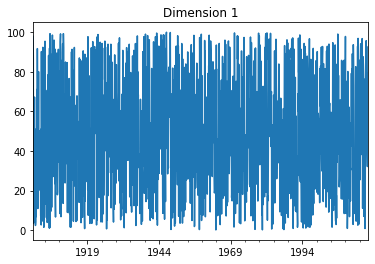

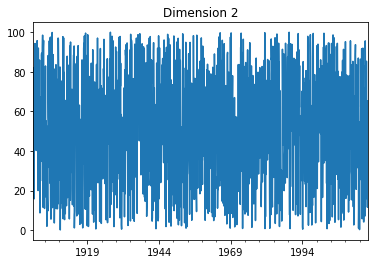

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def read_data(input_file, index):
    # Read the data from the input file
    input_file = '/content/drive/My Drive/Data UAS AI/data_2D.txt'
    input_data = np.loadtxt(input_file, delimiter=',')

    # Lambda function to convert strings to Pandas date format
    to_date = lambda x, y: str(int(x)) + '-' + str(int(y))

    # Extract the start date
    start = to_date(input_data[0, 0], input_data[0, 1])

    # Extract the end date
    if input_data[-1, 1] == 12:
        year = input_data[-1, 0] + 1
        month = 1
    else:
        year = input_data[-1, 0]
        month = input_data[-1, 1] + 1

    end = to_date(year, month)

    # Create a date list with a monthly frequency
    date_indices = pd.date_range(start, end, freq='M')

    # Add timestamps to the input data to create time-series data
    output = pd.Series(input_data[:, index], index=date_indices)

    return output 

if __name__=='__main__':
    # Input filename
    input_file = 'data_2D.txt'

    # Specify the columns that need to be converted 
    # into time-series data
    indices = [2, 3]

    # Iterate through the columns and plot the data
    for index in indices:
        # Convert the column to timeseries format
        timeseries = read_data(input_file, index)

        # Plot the data
        plt.figure()
        timeseries.plot()
        plt.title('Dimension ' + str(index - 1))

    plt.show()


In [ ]:
# Load input data
data = np.loadtxt('data_1D.txt', delimiter=',')

# Extract the data column (third column) for training 
X = np.column_stack([data[:, 2]])

# Create a Gaussian HMM 
num_components = 5
hmm = GaussianHMM(n_components=num_components, 
        covariance_type='diag', n_iter=1000)

# Train the HMM 
print('\nTraining the Hidden Markov Model...')
hmm.fit(X)

# Print HMM stats
print('\nMeans and variances:')
for i in range(hmm.n_components):
    print('\nHidden state', i+1)
    print('Mean =', round(hmm.means_[i][0], 2))
    print('Variance =', round(np.diag(hmm.covars_[i])[0], 2))

# Generate data using the HMM model
num_samples = 1200
generated_data, _ = hmm.sample(num_samples) 
plt.plot(np.arange(num_samples), generated_data[:, 0], c='black')
plt.title('Generated data')

plt.show()

## **FRAME**

**IMPORT LIBRARY**

In [69]:
import os
import importlib
import sys


In [71]:
__all__ = []

import sys
import numpy as np
import cv2 as cv

# NumPy documentation: https://numpy.org/doc/stable/user/basics.subclassing.html

class Mat(np.ndarray):
    '''
    cv.Mat wrapper for numpy array.

    Stores extra metadata information how to interpret and process of numpy array for underlying C++ code.
    '''

    def __new__(cls, arr, **kwargs):
        obj = arr.view(Mat)
        return obj

    def __init__(self, arr, **kwargs):
        self.wrap_channels = kwargs.pop('wrap_channels', getattr(arr, 'wrap_channels', False))
        if len(kwargs) > 0:
            raise TypeError('Unknown parameters: {}'.format(repr(kwargs)))

    def __array_finalize__(self, obj):
        if obj is None:
            return
        self.wrap_channels = getattr(obj, 'wrap_channels', None)


Mat.__module__ = cv.__name__
cv.Mat = Mat


In [82]:
import cv2
def get_ocv_version():
    return getattr(cv2, "__version__", "unavailable")


In [89]:
def namedtuple(typename, field_names, *, rename=False, defaults=None, module=None):
    """Returns a new subclass of tuple with named fields.

    >>> Point = namedtuple('Point', ['x', 'y'])
    >>> Point.__doc__                   # docstring for the new class
    'Point(x, y)'
    >>> p = Point(11, y=22)             # instantiate with positional args or keywords
    >>> p[0] + p[1]                     # indexable like a plain tuple
    33
    >>> x, y = p                        # unpack like a regular tuple
    >>> x, y
    (11, 22)
    >>> p.x + p.y                       # fields also accessible by name
    33
    >>> d = p._asdict()                 # convert to a dictionary
    >>> d['x']
    11
    >>> Point(**d)                      # convert from a dictionary
    Point(x=11, y=22)
    >>> p._replace(x=100)               # _replace() is like str.replace() but targets named fields
    Point(x=100, y=22)

    """

    # Validate the field names.  At the user's option, either generate an error
    # message or automatically replace the field name with a valid name.
    if isinstance(field_names, str):
        field_names = field_names.replace(',', ' ').split()
    field_names = list(map(str, field_names))
    typename = _sys.intern(str(typename))

    if rename:
        seen = set()
        for index, name in enumerate(field_names):
            if (not name.isidentifier()
                or _iskeyword(name)
                or name.startswith('_')
                or name in seen):
                field_names[index] = f'_{index}'
            seen.add(name)

    for name in [typename] + field_names:
        if type(name) is not str:
            raise TypeError('Type names and field names must be strings')
        if not name.isidentifier():
            raise ValueError('Type names and field names must be valid '
                             f'identifiers: {name!r}')
        if _iskeyword(name):
            raise ValueError('Type names and field names cannot be a '
                             f'keyword: {name!r}')

    seen = set()
    for name in field_names:
        if name.startswith('_') and not rename:
            raise ValueError('Field names cannot start with an underscore: '
                             f'{name!r}')
        if name in seen:
            raise ValueError(f'Encountered duplicate field name: {name!r}')
        seen.add(name)

    field_defaults = {}
    if defaults is not None:
        defaults = tuple(defaults)
        if len(defaults) > len(field_names):
            raise TypeError('Got more default values than field names')
        field_defaults = dict(reversed(list(zip(reversed(field_names),
                                                reversed(defaults)))))

    # Variables used in the methods and docstrings
    field_names = tuple(map(_sys.intern, field_names))
    num_fields = len(field_names)
    arg_list = ', '.join(field_names)
    if num_fields == 1:
        arg_list += ','
    repr_fmt = '(' + ', '.join(f'{name}=%r' for name in field_names) + ')'
    tuple_new = tuple.__new__
    _dict, _tuple, _len, _map, _zip = dict, tuple, len, map, zip

    # Create all the named tuple methods to be added to the class namespace

    namespace = {
        '_tuple_new': tuple_new,
        '__builtins__': {},
        '__name__': f'namedtuple_{typename}',
    }
    code = f'lambda _cls, {arg_list}: _tuple_new(_cls, ({arg_list}))'
    __new__ = eval(code, namespace)
    __new__.__name__ = '__new__'
    __new__.__doc__ = f'Create new instance of {typename}({arg_list})'
    if defaults is not None:
        __new__.__defaults__ = defaults

    @classmethod
    def _make(cls, iterable):
        result = tuple_new(cls, iterable)
        if _len(result) != num_fields:
            raise TypeError(f'Expected {num_fields} arguments, got {len(result)}')
        return result

    _make.__func__.__doc__ = (f'Make a new {typename} object from a sequence '
                              'or iterable')

   
    def __repr__(self):
        'Return a nicely formatted representation string'
        return self.__class__.__name__ + repr_fmt % self

    def _asdict(self):
        'Return a new dict which maps field names to their values.'
        return _dict(_zip(self._fields, self))

    def __getnewargs__(self):
        'Return self as a plain tuple.  Used by copy and pickle.'
        return _tuple(self)

    # Modify function metadata to help with introspection and debugging
    for method in (
        __new__,
        _make.__func__,
        _replace,
        __repr__,
        _asdict,
        __getnewargs__,
    ):
        method.__qualname__ = f'{typename}.{method.__name__}'

    # Build-up the class namespace dictionary
    # and use type() to build the result class
    class_namespace = {
        '__doc__': f'{typename}({arg_list})',
        '__slots__': (),
        '_fields': field_names,
        '_field_defaults': field_defaults,
        '__new__': __new__,
        '_make': _make,
        '_replace': _replace,
        '__repr__': __repr__,
        '_asdict': _asdict,
        '__getnewargs__': __getnewargs__,
        '__match_args__': field_names,
    }
    for index, name in enumerate(field_names):
        doc = _sys.intern(f'Alias for field number {index}')
        class_namespace[name] = _tuplegetter(index, doc)

    result = type(typename, (tuple,), class_namespace)

    # For pickling to work, the __module__ variable needs to be set to the frame
    # where the named tuple is created.  Bypass this step in environments where
    # sys._getframe is not defined (Jython for example) or sys._getframe is not
    # defined for arguments greater than 0 (IronPython), or where the user has
    # specified a particular module.
    if module is None:
        try:
            module = _sys._getframe(1).f_globals.get('__name__', '__main__')
        except (AttributeError, ValueError):
            pass
    if module is not None:
        result.__module__ = module

    return result



In [92]:
import cv2

def testOverwriteNativeMethod(arg):
    return NativeMethodPatchedResult(
        arg + 1,
        cv2.utils._native.testOverwriteNativeMethod(arg)
    )


In [97]:
r"""OS routines for NT or Posix depending on what system we're on.

This exports:
  - all functions from posix or nt, e.g. unlink, stat, etc.
  - os.path is either posixpath or ntpath
  - os.name is either 'posix' or 'nt'
  - os.curdir is a string representing the current directory (always '.')
  - os.pardir is a string representing the parent directory (always '..')
  - os.sep is the (or a most common) pathname separator ('/' or '\\')
  - os.extsep is the extension separator (always '.')
  - os.altsep is the alternate pathname separator (None or '/')
  - os.pathsep is the component separator used in $PATH etc
  - os.linesep is the line separator in text files ('\r' or '\n' or '\r\n')
  - os.defpath is the default search path for executables
  - os.devnull is the file path of the null device ('/dev/null', etc.)

Programs that import and use 'os' stand a better chance of being
portable between different platforms.  Of course, they must then
only use functions that are defined by all platforms (e.g., unlink
and opendir), and leave all pathname manipulation to os.path
(e.g., split and join).
"""

#'
import abc
import sys
import stat as st

def _check_methods(C, *methods):
    mro = C.__mro__
    for method in methods:
        for B in mro:
            if method in B.__dict__:
                if B.__dict__[method] is None:
                    return NotImplemented
                break
        else:
            return NotImplemented
    return True


_names = sys.builtin_module_names

# Note:  more names are added to __all__ later.
__all__ = ["altsep", "curdir", "pardir", "sep", "pathsep", "linesep",
           "defpath", "name", "path", "devnull", "SEEK_SET", "SEEK_CUR",
           "SEEK_END", "fsencode", "fsdecode", "get_exec_path", "fdopen",
           "extsep"]

def _exists(name):
    return name in globals()

def _get_exports_list(module):
    try:
        return list(module.__all__)
    except AttributeError:
        return [n for n in dir(module) if n[0] != '_']

# Any new dependencies of the os module and/or changes in path separator
# requires updating importlib as well.
if 'posix' in _names:
    name = 'posix'
    linesep = '\n'
    from posix import *
    try:
        from posix import _exit
        __all__.append('_exit')
    except ImportError:
        pass
    import posixpath as path

    try:
        from posix import _have_functions
    except ImportError:
        pass

    import posix
    __all__.extend(_get_exports_list(posix))
    del posix

elif 'nt' in _names:
    name = 'nt'
    linesep = '\r\n'
    from nt import *
    try:
        from nt import _exit
        __all__.append('_exit')
    except ImportError:
        pass
    import ntpath as path

    import nt
    __all__.extend(_get_exports_list(nt))
    del nt

    try:
        from nt import _have_functions
    except ImportError:
        pass

else:
    raise ImportError('no os specific module found')

sys.modules['os.path'] = path
from os.path import (curdir, pardir, sep, pathsep, defpath, extsep, altsep,
    devnull)

del _names


if _exists("_have_functions"):
    _globals = globals()
    def _add(str, fn):
        if (fn in _globals) and (str in _have_functions):
            _set.add(_globals[fn])

    _set = set()
    _add("HAVE_FACCESSAT",  "access")
    _add("HAVE_FCHMODAT",   "chmod")
    _add("HAVE_FCHOWNAT",   "chown")
    _add("HAVE_FSTATAT",    "stat")
    _add("HAVE_FUTIMESAT",  "utime")
    _add("HAVE_LINKAT",     "link")
    _add("HAVE_MKDIRAT",    "mkdir")
    _add("HAVE_MKFIFOAT",   "mkfifo")
    _add("HAVE_MKNODAT",    "mknod")
    _add("HAVE_OPENAT",     "open")
    _add("HAVE_READLINKAT", "readlink")
    _add("HAVE_RENAMEAT",   "rename")
    _add("HAVE_SYMLINKAT",  "symlink")
    _add("HAVE_UNLINKAT",   "unlink")
    _add("HAVE_UNLINKAT",   "rmdir")
    _add("HAVE_UTIMENSAT",  "utime")
    supports_dir_fd = _set

    _set = set()
    _add("HAVE_FACCESSAT",  "access")
    supports_effective_ids = _set

    _set = set()
    _add("HAVE_FCHDIR",     "chdir")
    _add("HAVE_FCHMOD",     "chmod")
    _add("HAVE_FCHOWN",     "chown")
    _add("HAVE_FDOPENDIR",  "listdir")
    _add("HAVE_FDOPENDIR",  "scandir")
    _add("HAVE_FEXECVE",    "execve")
    _set.add(stat) # fstat always works
    _add("HAVE_FTRUNCATE",  "truncate")
    _add("HAVE_FUTIMENS",   "utime")
    _add("HAVE_FUTIMES",    "utime")
    _add("HAVE_FPATHCONF",  "pathconf")
    if _exists("statvfs") and _exists("fstatvfs"): # mac os x10.3
        _add("HAVE_FSTATVFS", "statvfs")
    supports_fd = _set

    _set = set()
    _add("HAVE_FACCESSAT",  "access")
    # Some platforms don't support lchmod().  Often the function exists
    # anyway, as a stub that always returns ENOSUP or perhaps EOPNOTSUPP.
    # (No, I don't know why that's a good design.)  ./configure will detect
    # this and reject it--so HAVE_LCHMOD still won't be defined on such
    # platforms.  This is Very Helpful.
    #
    # However, sometimes platforms without a working lchmod() *do* have
    # fchmodat().  (Examples: Linux kernel 3.2 with glibc 2.15,
    # OpenIndiana 3.x.)  And fchmodat() has a flag that theoretically makes
    # it behave like lchmod().  So in theory it would be a suitable
    # replacement for lchmod().  But when lchmod() doesn't work, fchmodat()'s
    # flag doesn't work *either*.  Sadly ./configure isn't sophisticated
    # enough to detect this condition--it only determines whether or not
    # fchmodat() minimally works.
    #
    # Therefore we simply ignore fchmodat() when deciding whether or not
    # os.chmod supports follow_symlinks.  Just checking lchmod() is
    # sufficient.  After all--if you have a working fchmodat(), your
    # lchmod() almost certainly works too.
    #
    # _add("HAVE_FCHMODAT",   "chmod")
    _add("HAVE_FCHOWNAT",   "chown")
    _add("HAVE_FSTATAT",    "stat")
    _add("HAVE_LCHFLAGS",   "chflags")
    _add("HAVE_LCHMOD",     "chmod")
    if _exists("lchown"): # mac os x10.3
        _add("HAVE_LCHOWN", "chown")
    _add("HAVE_LINKAT",     "link")
    _add("HAVE_LUTIMES",    "utime")
    _add("HAVE_LSTAT",      "stat")
    _add("HAVE_FSTATAT",    "stat")
    _add("HAVE_UTIMENSAT",  "utime")
    _add("MS_WINDOWS",      "stat")
    supports_follow_symlinks = _set

    del _set
    del _have_functions
    del _globals
    del _add


# Python uses fixed values for the SEEK_ constants; they are mapped
# to native constants if necessary in posixmodule.c
# Other possible SEEK values are directly imported from posixmodule.c
SEEK_SET = 0
SEEK_CUR = 1
SEEK_END = 2

# Super directory utilities.
# (Inspired by Eric Raymond; the doc strings are mostly his)

def makedirs(name, mode=0o777, exist_ok=False):
    """makedirs(name [, mode=0o777][, exist_ok=False])

    Super-mkdir; create a leaf directory and all intermediate ones.  Works like
    mkdir, except that any intermediate path segment (not just the rightmost)
    will be created if it does not exist. If the target directory already
    exists, raise an OSError if exist_ok is False. Otherwise no exception is
    raised.  This is recursive.

    """
    head, tail = path.split(name)
    if not tail:
        head, tail = path.split(head)
    if head and tail and not path.exists(head):
        try:
            makedirs(head, exist_ok=exist_ok)
        except FileExistsError:
            # Defeats race condition when another thread created the path
            pass
        cdir = curdir
        if isinstance(tail, bytes):
            cdir = bytes(curdir, 'ASCII')
        if tail == cdir:           # xxx/newdir/. exists if xxx/newdir exists
            return
    try:
        mkdir(name, mode)
    except OSError:
        # Cannot rely on checking for EEXIST, since the operating system
        # could give priority to other errors like EACCES or EROFS
        if not exist_ok or not path.isdir(name):
            raise

def removedirs(name):
    """removedirs(name)

    Super-rmdir; remove a leaf directory and all empty intermediate
    ones.  Works like rmdir except that, if the leaf directory is
    successfully removed, directories corresponding to rightmost path
    segments will be pruned away until either the whole path is
    consumed or an error occurs.  Errors during this latter phase are
    ignored -- they generally mean that a directory was not empty.

    """
    rmdir(name)
    head, tail = path.split(name)
    if not tail:
        head, tail = path.split(head)
    while head and tail:
        try:
            rmdir(head)
        except OSError:
            break
        head, tail = path.split(head)

def renames(old, new):
    """renames(old, new)

    Super-rename; create directories as necessary and delete any left
    empty.  Works like rename, except creation of any intermediate
    directories needed to make the new pathname good is attempted
    first.  After the rename, directories corresponding to rightmost
    path segments of the old name will be pruned until either the
    whole path is consumed or a nonempty directory is found.

    Note: this function can fail with the new directory structure made
    if you lack permissions needed to unlink the leaf directory or
    file.

    """
    head, tail = path.split(new)
    if head and tail and not path.exists(head):
        makedirs(head)
    rename(old, new)
    head, tail = path.split(old)
    if head and tail:
        try:
            removedirs(head)
        except OSError:
            pass

__all__.extend(["makedirs", "removedirs", "renames"])

def walk(top, topdown=True, onerror=None, followlinks=False):
    """Directory tree generator.

    For each directory in the directory tree rooted at top (including top
    itself, but excluding '.' and '..'), yields a 3-tuple

        dirpath, dirnames, filenames

    dirpath is a string, the path to the directory.  dirnames is a list of
    the names of the subdirectories in dirpath (excluding '.' and '..').
    filenames is a list of the names of the non-directory files in dirpath.
    Note that the names in the lists are just names, with no path components.
    To get a full path (which begins with top) to a file or directory in
    dirpath, do os.path.join(dirpath, name).

    If optional arg 'topdown' is true or not specified, the triple for a
    directory is generated before the triples for any of its subdirectories
    (directories are generated top down).  If topdown is false, the triple
    for a directory is generated after the triples for all of its
    subdirectories (directories are generated bottom up).

    When topdown is true, the caller can modify the dirnames list in-place
    (e.g., via del or slice assignment), and walk will only recurse into the
    subdirectories whose names remain in dirnames; this can be used to prune the
    search, or to impose a specific order of visiting.  Modifying dirnames when
    topdown is false has no effect on the behavior of os.walk(), since the
    directories in dirnames have already been generated by the time dirnames
    itself is generated. No matter the value of topdown, the list of
    subdirectories is retrieved before the tuples for the directory and its
    subdirectories are generated.

    By default errors from the os.scandir() call are ignored.  If
    optional arg 'onerror' is specified, it should be a function; it
    will be called with one argument, an OSError instance.  It can
    report the error to continue with the walk, or raise the exception
    to abort the walk.  Note that the filename is available as the
    filename attribute of the exception object.

    By default, os.walk does not follow symbolic links to subdirectories on
    systems that support them.  In order to get this functionality, set the
    optional argument 'followlinks' to true.

    Caution:  if you pass a relative pathname for top, don't change the
    current working directory between resumptions of walk.  walk never
    changes the current directory, and assumes that the client doesn't
    either.

    Example:

    import os
    from os.path import join, getsize
    for root, dirs, files in os.walk('python/Lib/email'):
        print(root, "consumes", end="")
        print(sum(getsize(join(root, name)) for name in files), end="")
        print("bytes in", len(files), "non-directory files")
        if 'CVS' in dirs:
            dirs.remove('CVS')  # don't visit CVS directories

    """
    sys.audit("os.walk", top, topdown, onerror, followlinks)
    return _walk(fspath(top), topdown, onerror, followlinks)

def _walk(top, topdown, onerror, followlinks):
    dirs = []
    nondirs = []
    walk_dirs = []

    # We may not have read permission for top, in which case we can't
    # get a list of the files the directory contains.  os.walk
    # always suppressed the exception then, rather than blow up for a
    # minor reason when (say) a thousand readable directories are still
    # left to visit.  That logic is copied here.
    try:
        # Note that scandir is global in this module due
        # to earlier import-*.
        scandir_it = scandir(top)
    except OSError as error:
        if onerror is not None:
            onerror(error)
        return

    with scandir_it:
        while True:
            try:
                try:
                    entry = next(scandir_it)
                except StopIteration:
                    break
            except OSError as error:
                if onerror is not None:
                    onerror(error)
                return

            try:
                is_dir = entry.is_dir()
            except OSError:
                # If is_dir() raises an OSError, consider that the entry is not
                # a directory, same behaviour than os.path.isdir().
                is_dir = False

            if is_dir:
                dirs.append(entry.name)
            else:
                nondirs.append(entry.name)

            if not topdown and is_dir:
                # Bottom-up: recurse into sub-directory, but exclude symlinks to
                # directories if followlinks is False
                if followlinks:
                    walk_into = True
                else:
                    try:
                        is_symlink = entry.is_symlink()
                    except OSError:
                        # If is_symlink() raises an OSError, consider that the
                        # entry is not a symbolic link, same behaviour than
                        # os.path.islink().
                        is_symlink = False
                    walk_into = not is_symlink

                if walk_into:
                    walk_dirs.append(entry.path)

    # Yield before recursion if going top down
    if topdown:
        yield top, dirs, nondirs

        # Recurse into sub-directories
        islink, join = path.islink, path.join
        for dirname in dirs:
            new_path = join(top, dirname)
            # Issue #23605: os.path.islink() is used instead of caching
            # entry.is_symlink() result during the loop on os.scandir() because
            # the caller can replace the directory entry during the "yield"
            # above.
            if followlinks or not islink(new_path):
                yield from _walk(new_path, topdown, onerror, followlinks)
    else:
        # Recurse into sub-directories
        for new_path in walk_dirs:
            yield from _walk(new_path, topdown, onerror, followlinks)
        # Yield after recursion if going bottom up
        yield top, dirs, nondirs

__all__.append("walk")

if {open, stat} <= supports_dir_fd and {scandir, stat} <= supports_fd:

    def fwalk(top=".", topdown=True, onerror=None, *, follow_symlinks=False, dir_fd=None):
        """Directory tree generator.

        This behaves exactly like walk(), except that it yields a 4-tuple

            dirpath, dirnames, filenames, dirfd

        `dirpath`, `dirnames` and `filenames` are identical to walk() output,
        and `dirfd` is a file descriptor referring to the directory `dirpath`.

        The advantage of fwalk() over walk() is that it's safe against symlink
        races (when follow_symlinks is False).

        If dir_fd is not None, it should be a file descriptor open to a directory,
          and top should be relative; top will then be relative to that directory.
          (dir_fd is always supported for fwalk.)

        Caution:
        Since fwalk() yields file descriptors, those are only valid until the
        next iteration step, so you should dup() them if you want to keep them
        for a longer period.

        Example:

        import os
        for root, dirs, files, rootfd in os.fwalk('python/Lib/email'):
            print(root, "consumes", end="")
            print(sum(os.stat(name, dir_fd=rootfd).st_size for name in files),
                  end="")
            print("bytes in", len(files), "non-directory files")
            if 'CVS' in dirs:
                dirs.remove('CVS')  # don't visit CVS directories
        """
        sys.audit("os.fwalk", top, topdown, onerror, follow_symlinks, dir_fd)
        if not isinstance(top, int) or not hasattr(top, '__index__'):
            top = fspath(top)
        # Note: To guard against symlink races, we use the standard
        # lstat()/open()/fstat() trick.
        if not follow_symlinks:
            orig_st = stat(top, follow_symlinks=False, dir_fd=dir_fd)
        topfd = open(top, O_RDONLY, dir_fd=dir_fd)
        try:
            if (follow_symlinks or (st.S_ISDIR(orig_st.st_mode) and
                                    path.samestat(orig_st, stat(topfd)))):
                yield from _fwalk(topfd, top, isinstance(top, bytes),
                                  topdown, onerror, follow_symlinks)
        finally:
            close(topfd)

    def _fwalk(topfd, toppath, isbytes, topdown, onerror, follow_symlinks):
        # Note: This uses O(depth of the directory tree) file descriptors: if
        # necessary, it can be adapted to only require O(1) FDs, see issue
        # #13734.

        scandir_it = scandir(topfd)
        dirs = []
        nondirs = []
        entries = None if topdown or follow_symlinks else []
        for entry in scandir_it:
            name = entry.name
            if isbytes:
                name = fsencode(name)
            try:
                if entry.is_dir():
                    dirs.append(name)
                    if entries is not None:
                        entries.append(entry)
                else:
                    nondirs.append(name)
            except OSError:
                try:
                    # Add dangling symlinks, ignore disappeared files
                    if entry.is_symlink():
                        nondirs.append(name)
                except OSError:
                    pass

        if topdown:
            yield toppath, dirs, nondirs, topfd

        for name in dirs if entries is None else zip(dirs, entries):
            try:
                if not follow_symlinks:
                    if topdown:
                        orig_st = stat(name, dir_fd=topfd, follow_symlinks=False)
                    else:
                        assert entries is not None
                        name, entry = name
                        orig_st = entry.stat(follow_symlinks=False)
                dirfd = open(name, O_RDONLY, dir_fd=topfd)
            except OSError as err:
                if onerror is not None:
                    onerror(err)
                continue
            try:
                if follow_symlinks or path.samestat(orig_st, stat(dirfd)):
                    dirpath = path.join(toppath, name)
                    yield from _fwalk(dirfd, dirpath, isbytes,
                                      topdown, onerror, follow_symlinks)
            finally:
                close(dirfd)

        if not topdown:
            yield toppath, dirs, nondirs, topfd

    __all__.append("fwalk")

def execl(file, *args):
    """execl(file, *args)

    Execute the executable file with argument list args, replacing the
    current process. """
    execv(file, args)

def execle(file, *args):
    """execle(file, *args, env)

    Execute the executable file with argument list args and
    environment env, replacing the current process. """
    env = args[-1]
    execve(file, args[:-1], env)

def execlp(file, *args):
    """execlp(file, *args)

    Execute the executable file (which is searched for along $PATH)
    with argument list args, replacing the current process. """
    execvp(file, args)

def execlpe(file, *args):
    """execlpe(file, *args, env)

    Execute the executable file (which is searched for along $PATH)
    with argument list args and environment env, replacing the current
    process. """
    env = args[-1]
    execvpe(file, args[:-1], env)

def execvp(file, args):
    """execvp(file, args)

    Execute the executable file (which is searched for along $PATH)
    with argument list args, replacing the current process.
    args may be a list or tuple of strings. """
    _execvpe(file, args)

def execvpe(file, args, env):
    """execvpe(file, args, env)

    Execute the executable file (which is searched for along $PATH)
    with argument list args and environment env, replacing the
    current process.
    args may be a list or tuple of strings. """
    _execvpe(file, args, env)

__all__.extend(["execl","execle","execlp","execlpe","execvp","execvpe"])

def _execvpe(file, args, env=None):
    if env is not None:
        exec_func = execve
        argrest = (args, env)
    else:
        exec_func = execv
        argrest = (args,)
        env = environ

    if path.dirname(file):
        exec_func(file, *argrest)
        return
    saved_exc = None
    path_list = get_exec_path(env)
    if name != 'nt':
        file = fsencode(file)
        path_list = map(fsencode, path_list)
    for dir in path_list:
        fullname = path.join(dir, file)
        try:
            exec_func(fullname, *argrest)
        except (FileNotFoundError, NotADirectoryError) as e:
            last_exc = e
        except OSError as e:
            last_exc = e
            if saved_exc is None:
                saved_exc = e
    if saved_exc is not None:
        raise saved_exc
    raise last_exc


def get_exec_path(env=None):
    """Returns the sequence of directories that will be searched for the
    named executable (similar to a shell) when launching a process.

    *env* must be an environment variable dict or None.  If *env* is None,
    os.environ will be used.
    """
    # Use a local import instead of a global import to limit the number of
    # modules loaded at startup: the os module is always loaded at startup by
    # Python. It may also avoid a bootstrap issue.
    import warnings

    if env is None:
        env = environ

    # {b'PATH': ...}.get('PATH') and {'PATH': ...}.get(b'PATH') emit a
    # BytesWarning when using python -b or python -bb: ignore the warning
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", BytesWarning)

        try:
            path_list = env.get('PATH')
        except TypeError:
            path_list = None

        if supports_bytes_environ:
            try:
                path_listb = env[b'PATH']
            except (KeyError, TypeError):
                pass
            else:
                if path_list is not None:
                    raise ValueError(
                        "env cannot contain 'PATH' and b'PATH' keys")
                path_list = path_listb

            if path_list is not None and isinstance(path_list, bytes):
                path_list = fsdecode(path_list)

    if path_list is None:
        path_list = defpath
    return path_list.split(pathsep)


# Change environ to automatically call putenv() and unsetenv()
from _collections_abc import MutableMapping, Mapping

class _Environ(MutableMapping):
    def __init__(self, data, encodekey, decodekey, encodevalue, decodevalue):
        self.encodekey = encodekey
        self.decodekey = decodekey
        self.encodevalue = encodevalue
        self.decodevalue = decodevalue
        self._data = data

    def __getitem__(self, key):
        try:
            value = self._data[self.encodekey(key)]
        except KeyError:
            # raise KeyError with the original key value
            raise KeyError(key) from None
        return self.decodevalue(value)

    def __setitem__(self, key, value):
        key = self.encodekey(key)
        value = self.encodevalue(value)
        putenv(key, value)
        self._data[key] = value

    def __delitem__(self, key):
        encodedkey = self.encodekey(key)
        unsetenv(encodedkey)
        try:
            del self._data[encodedkey]
        except KeyError:
            # raise KeyError with the original key value
            raise KeyError(key) from None

    def __iter__(self):
        # list() from dict object is an atomic operation
        keys = list(self._data)
        for key in keys:
            yield self.decodekey(key)

    def __len__(self):
        return len(self._data)

    def __repr__(self):
        return 'environ({{{}}})'.format(', '.join(
            ('{!r}: {!r}'.format(self.decodekey(key), self.decodevalue(value))
            for key, value in self._data.items())))

    def copy(self):
        return dict(self)

    def setdefault(self, key, value):
        if key not in self:
            self[key] = value
        return self[key]

    def __ior__(self, other):
        self.update(other)
        return self

    def __or__(self, other):
        if not isinstance(other, Mapping):
            return NotImplemented
        new = dict(self)
        new.update(other)
        return new

    def __ror__(self, other):
        if not isinstance(other, Mapping):
            return NotImplemented
        new = dict(other)
        new.update(self)
        return new

def _createenviron():
    if name == 'nt':
        # Where Env Var Names Must Be UPPERCASE
        def check_str(value):
            if not isinstance(value, str):
                raise TypeError("str expected, not %s" % type(value).__name__)
            return value
        encode = check_str
        decode = str
        def encodekey(key):
            return encode(key).upper()
        data = {}
        for key, value in environ.items():
            data[encodekey(key)] = value
    else:
        # Where Env Var Names Can Be Mixed Case
        encoding = sys.getfilesystemencoding()
        def encode(value):
            if not isinstance(value, str):
                raise TypeError("str expected, not %s" % type(value).__name__)
            return value.encode(encoding, 'surrogateescape')
        def decode(value):
            return value.decode(encoding, 'surrogateescape')
        encodekey = encode
        data = environ
    return _Environ(data,
        encodekey, decode,
        encode, decode)

# unicode environ
environ = _createenviron()
del _createenviron


def getenv(key, default=None):
    """Get an environment variable, return None if it doesn't exist.
    The optional second argument can specify an alternate default.
    key, default and the result are str."""
    return environ.get(key, default)

supports_bytes_environ = (name != 'nt')
__all__.extend(("getenv", "supports_bytes_environ"))

if supports_bytes_environ:
    def _check_bytes(value):
        if not isinstance(value, bytes):
            raise TypeError("bytes expected, not %s" % type(value).__name__)
        return value

    # bytes environ
    environb = _Environ(environ._data,
        _check_bytes, bytes,
        _check_bytes, bytes)
    del _check_bytes

    def getenvb(key, default=None):
        """Get an environment variable, return None if it doesn't exist.
        The optional second argument can specify an alternate default.
        key, default and the result are bytes."""
        return environb.get(key, default)

    __all__.extend(("environb", "getenvb"))

def _fscodec():
    encoding = sys.getfilesystemencoding()
    errors = sys.getfilesystemencodeerrors()

    def fsencode(filename):
        """Encode filename (an os.PathLike, bytes, or str) to the filesystem
        encoding with 'surrogateescape' error handler, return bytes unchanged.
        On Windows, use 'strict' error handler if the file system encoding is
        'mbcs' (which is the default encoding).
        """
        filename = fspath(filename)  # Does type-checking of `filename`.
        if isinstance(filename, str):
            return filename.encode(encoding, errors)
        else:
            return filename

    def fsdecode(filename):
        """Decode filename (an os.PathLike, bytes, or str) from the filesystem
        encoding with 'surrogateescape' error handler, return str unchanged. On
        Windows, use 'strict' error handler if the file system encoding is
        'mbcs' (which is the default encoding).
        """
        filename = fspath(filename)  # Does type-checking of `filename`.
        if isinstance(filename, bytes):
            return filename.decode(encoding, errors)
        else:
            return filename

    return fsencode, fsdecode

fsencode, fsdecode = _fscodec()
del _fscodec

# Supply spawn*() (probably only for Unix)
if _exists("fork") and not _exists("spawnv") and _exists("execv"):

    P_WAIT = 0
    P_NOWAIT = P_NOWAITO = 1

    __all__.extend(["P_WAIT", "P_NOWAIT", "P_NOWAITO"])

    # XXX Should we support P_DETACH?  I suppose it could fork()**2
    # and close the std I/O streams.  Also, P_OVERLAY is the same
    # as execv*()?

    def _spawnvef(mode, file, args, env, func):
        # Internal helper; func is the exec*() function to use
        if not isinstance(args, (tuple, list)):
            raise TypeError('argv must be a tuple or a list')
        if not args or not args[0]:
            raise ValueError('argv first element cannot be empty')
        pid = fork()
        if not pid:
            # Child
            try:
                if env is None:
                    func(file, args)
                else:
                    func(file, args, env)
            except:
                _exit(127)
        else:
            # Parent
            if mode == P_NOWAIT:
                return pid # Caller is responsible for waiting!
            while 1:
                wpid, sts = waitpid(pid, 0)
                if WIFSTOPPED(sts):
                    continue

                return waitstatus_to_exitcode(sts)

    def spawnv(mode, file, args):
        """spawnv(mode, file, args) -> integer

Execute file with arguments from args in a subprocess.
If mode == P_NOWAIT return the pid of the process.
If mode == P_WAIT return the process's exit code if it exits normally;
otherwise return -SIG, where SIG is the signal that killed it. """
        return _spawnvef(mode, file, args, None, execv)

    def spawnve(mode, file, args, env):
        """spawnve(mode, file, args, env) -> integer

Execute file with arguments from args in a subprocess with the
specified environment.
If mode == P_NOWAIT return the pid of the process.
If mode == P_WAIT return the process's exit code if it exits normally;
otherwise return -SIG, where SIG is the signal that killed it. """
        return _spawnvef(mode, file, args, env, execve)

    # Note: spawnvp[e] isn't currently supported on Windows

    def spawnvp(mode, file, args):
        """spawnvp(mode, file, args) -> integer

Execute file (which is looked for along $PATH) with arguments from
args in a subprocess.
If mode == P_NOWAIT return the pid of the process.
If mode == P_WAIT return the process's exit code if it exits normally;
otherwise return -SIG, where SIG is the signal that killed it. """
        return _spawnvef(mode, file, args, None, execvp)

    def spawnvpe(mode, file, args, env):
        """spawnvpe(mode, file, args, env) -> integer

Execute file (which is looked for along $PATH) with arguments from
args in a subprocess with the supplied environment.
If mode == P_NOWAIT return the pid of the process.
If mode == P_WAIT return the process's exit code if it exits normally;
otherwise return -SIG, where SIG is the signal that killed it. """
        return _spawnvef(mode, file, args, env, execvpe)


    __all__.extend(["spawnv", "spawnve", "spawnvp", "spawnvpe"])


if _exists("spawnv"):
    # These aren't supplied by the basic Windows code
    # but can be easily implemented in Python

    def spawnl(mode, file, *args):
        """spawnl(mode, file, *args) -> integer

Execute file with arguments from args in a subprocess.
If mode == P_NOWAIT return the pid of the process.
If mode == P_WAIT return the process's exit code if it exits normally;
otherwise return -SIG, where SIG is the signal that killed it. """
        return spawnv(mode, file, args)

    def spawnle(mode, file, *args):
        """spawnle(mode, file, *args, env) -> integer

Execute file with arguments from args in a subprocess with the
supplied environment.
If mode == P_NOWAIT return the pid of the process.
If mode == P_WAIT return the process's exit code if it exits normally;
otherwise return -SIG, where SIG is the signal that killed it. """
        env = args[-1]
        return spawnve(mode, file, args[:-1], env)


    __all__.extend(["spawnl", "spawnle"])


if _exists("spawnvp"):
    # At the moment, Windows doesn't implement spawnvp[e],
    # so it won't have spawnlp[e] either.
    def spawnlp(mode, file, *args):
        """spawnlp(mode, file, *args) -> integer

Execute file (which is looked for along $PATH) with arguments from
args in a subprocess with the supplied environment.
If mode == P_NOWAIT return the pid of the process.
If mode == P_WAIT return the process's exit code if it exits normally;
otherwise return -SIG, where SIG is the signal that killed it. """
        return spawnvp(mode, file, args)

    def spawnlpe(mode, file, *args):
        """spawnlpe(mode, file, *args, env) -> integer

Execute file (which is looked for along $PATH) with arguments from
args in a subprocess with the supplied environment.
If mode == P_NOWAIT return the pid of the process.
If mode == P_WAIT return the process's exit code if it exits normally;
otherwise return -SIG, where SIG is the signal that killed it. """
        env = args[-1]
        return spawnvpe(mode, file, args[:-1], env)


    __all__.extend(["spawnlp", "spawnlpe"])

# VxWorks has no user space shell provided. As a result, running
# command in a shell can't be supported.
if sys.platform != 'vxworks':
    # Supply os.popen()
    def popen(cmd, mode="r", buffering=-1):
        if not isinstance(cmd, str):
            raise TypeError("invalid cmd type (%s, expected string)" % type(cmd))
        if mode not in ("r", "w"):
            raise ValueError("invalid mode %r" % mode)
        if buffering == 0 or buffering is None:
            raise ValueError("popen() does not support unbuffered streams")
        import subprocess, io
        if mode == "r":
            proc = subprocess.Popen(cmd,
                                    shell=True, text=True,
                                    stdout=subprocess.PIPE,
                                    bufsize=buffering)
            return _wrap_close(proc.stdout, proc)
        else:
            proc = subprocess.Popen(cmd,
                                    shell=True, text=True,
                                    stdin=subprocess.PIPE,
                                    bufsize=buffering)
            return _wrap_close(proc.stdin, proc)

    # Helper for popen() -- a proxy for a file whose close waits for the process
    class _wrap_close:
        def __init__(self, stream, proc):
            self._stream = stream
            self._proc = proc
        def close(self):
            self._stream.close()
            returncode = self._proc.wait()
            if returncode == 0:
                return None
            if name == 'nt':
                return returncode
            else:
                return returncode << 8  # Shift left to match old behavior
        def __enter__(self):
            return self
        def __exit__(self, *args):
            self.close()
        def __getattr__(self, name):
            return getattr(self._stream, name)
        def __iter__(self):
            return iter(self._stream)

    __all__.append("popen")

# Supply os.fdopen()
def fdopen(fd, mode="r", buffering=-1, encoding=None, *args, **kwargs):
    if not isinstance(fd, int):
        raise TypeError("invalid fd type (%s, expected integer)" % type(fd))
    import io
    if "b" not in mode:
        encoding = io.text_encoding(encoding)
    return io.open(fd, mode, buffering, encoding, *args, **kwargs)


# For testing purposes, make sure the function is available when the C
# implementation exists.
def _fspath(path):
    """Return the path representation of a path-like object.

    If str or bytes is passed in, it is returned unchanged. Otherwise the
    os.PathLike interface is used to get the path representation. If the
    path representation is not str or bytes, TypeError is raised. If the
    provided path is not str, bytes, or os.PathLike, TypeError is raised.
    """
    if isinstance(path, (str, bytes)):
        return path

    # Work from the object's type to match method resolution of other magic
    # methods.
    path_type = type(path)
    try:
        path_repr = path_type.__fspath__(path)
    except AttributeError:
        if hasattr(path_type, '__fspath__'):
            raise
        else:
            raise TypeError("expected str, bytes or os.PathLike object, "
                            "not " + path_type.__name__)
    if isinstance(path_repr, (str, bytes)):
        return path_repr
    else:
        raise TypeError("expected {}.__fspath__() to return str or bytes, "
                        "not {}".format(path_type.__name__,
                                        type(path_repr).__name__))

# If there is no C implementation, make the pure Python version the
# implementation as transparently as possible.
if not _exists('fspath'):
    fspath = _fspath
    fspath.__name__ = "fspath"


class PathLike(abc.ABC):

    """Abstract base class for implementing the file system path protocol."""

    @abc.abstractmethod
    def __fspath__(self):
        """Return the file system path representation of the object."""
        raise NotImplementedError

    @classmethod
    def __subclasshook__(cls, subclass):
        if cls is PathLike:
            return _check_methods(subclass, '__fspath__')
        return NotImplemented


if name == 'nt':
    class _AddedDllDirectory:
        def __init__(self, path, cookie, remove_dll_directory):
            self.path = path
            self._cookie = cookie
            self._remove_dll_directory = remove_dll_directory
        def close(self):
            self._remove_dll_directory(self._cookie)
            self.path = None
        def __enter__(self):
            return self
        def __exit__(self, *args):
            self.close()
        def __repr__(self):
            if self.path:
                return "<AddedDllDirectory({!r})>".format(self.path)
            return "<AddedDllDirectory()>"

    def add_dll_directory(path):
        """Add a path to the DLL search path.

        This search path is used when resolving dependencies for imported
        extension modules (the module itself is resolved through sys.path),
        and also by ctypes.

        Remove the directory by calling close() on the returned object or
        using it in a with statement.
        """
        import nt
        cookie = nt._add_dll_directory(path)
        return _AddedDllDirectory(
            path,
            cookie,
            nt._remove_dll_directory
        )


**IMPORT VERSION**

In [99]:
opencv_version = "4.5.5.64"
contrib = False
headless = False
ci_build = True

In [129]:
'''
OpenCV Python binary extension loader
'''
import os
import importlib
import sys


__all__ = []

try:
    import numpy
    import numpy.core.multiarray
except ImportError:
    print('OpenCV bindings requires "numpy" package.')
    print('Install it via command:')
    print('    pip install numpy')
    raise

# TODO
# is_x64 = sys.maxsize > 2**32


def __load_extra_py_code_for_module(base, name, enable_debug_print=False):
    module_name = "{}.{}".format(__name__, name)
    export_module_name = "{}.{}".format(base, name)
    native_module = sys.modules.pop(module_name, None)
    try:
        py_module = importlib.import_module(module_name)
    except ImportError as err:
        if enable_debug_print:
            print("Can't load Python code for module:", module_name,
                  ". Reason:", err)
        # Extension doesn't contain extra py code
        return False

    if not hasattr(base, name):
        setattr(sys.modules[base], name, py_module)
    sys.modules[export_module_name] = py_module
    # If it is C extension module it is already loaded by cv2 package
    if native_module:
        setattr(py_module, "_native", native_module)
        for k, v in filter(lambda kv: not hasattr(py_module, kv[0]),
                           native_module.__dict__.items()):
            if enable_debug_print: print('    symbol({}): {} = {}'.format(name, k, v))
            setattr(py_module, k, v)
    return True


def __collect_extra_submodules(enable_debug_print=False):
    def modules_filter(module):
        return all((
             # module is not internal
             not module.startswith("_"),
             not module.startswith("python-"),
             # it is not a file
             os.path.isdir(os.path.join(_extra_submodules_init_path, module))
        ))
    if sys.version_info[0] < 3:
        if enable_debug_print:
            print("Extra submodules is loaded only for Python 3")
        return []


def bootstrap():
    import sys

    import copy
    save_sys_path = copy.copy(sys.path)

    if hasattr(sys, 'OpenCV_LOADER'):
        print(sys.path)
    sys.OpenCV_LOADER = True

    DEBUG = False
    if hasattr(sys, 'OpenCV_LOADER_DEBUG'):
        DEBUG = True

    import platform
    if DEBUG: print('OpenCV loader: os.name="{}"  platform.system()="{}"'.format(os.name, str(platform.system())))

 
    PYTHON_EXTENSIONS_PATHS = []
    BINARIES_PATHS = []

    g_vars = globals()
    l_vars = locals()

    
    def load_first_config(fnames, required=True):
        for fname in fnames:
                if DEBUG: print('OpenCV loader: config not found, skip: {}'.format(fpath))
                continue
        
    load_first_config(['config.py'], True)
    load_first_config([
        'config-{}.{}.py'.format(sys.version_info[0], sys.version_info[1]),
        'config-{}.py'.format(sys.version_info[0])
    ], True)

    if DEBUG: print('OpenCV loader: PYTHON_EXTENSIONS_PATHS={}'.format(str(l_vars['PYTHON_EXTENSIONS_PATHS'])))
    if DEBUG: print('OpenCV loader: BINARIES_PATHS={}'.format(str(l_vars['BINARIES_PATHS'])))

    applySysPathWorkaround = False
    if hasattr(sys, 'OpenCV_REPLACE_SYS_PATH_0'):
        applySysPathWorkaround = True
    else:
        try:
            BASE_DIR = os.path.dirname(LOADER_DIR)
            if sys.path[0] == BASE_DIR or os.path.realpath(sys.path[0]) == BASE_DIR:
                applySysPathWorkaround = True
        except:
            if DEBUG: print('OpenCV loader: exception during checking workaround for sys.path[0]')
            pass  # applySysPathWorkaround is False

    for p in reversed(l_vars['PYTHON_EXTENSIONS_PATHS']):
        sys.path.insert(1 if not applySysPathWorkaround else 0, p)

    if os.name == 'nt':
        if sys.version_info[:2] >= (3, 8):  # https://github.com/python/cpython/pull/12302
            for p in l_vars['BINARIES_PATHS']:
                try:
                    os.add_dll_directory(p)
                except Exception as e:
                    if DEBUG: print('Failed os.add_dll_directory(): '+ str(e))
                    pass
        os.environ['PATH'] = ';'.join(l_vars['BINARIES_PATHS']) + ';' + os.environ.get('PATH', '')
        if DEBUG: print('OpenCV loader: PATH={}'.format(str(os.environ['PATH'])))
    else:
        # amending of LD_LIBRARY_PATH works for sub-processes only
        os.environ['LD_LIBRARY_PATH'] = ':'.join(l_vars['BINARIES_PATHS']) + ':' + os.environ.get('LD_LIBRARY_PATH', '')

    if DEBUG: print("Relink everything from native cv2 module to cv2 package")

    py_module = sys.modules.pop("cv2")

    native_module = importlib.import_module("cv2.cv2")

    sys.modules["cv2"] = py_module
    setattr(py_module, "_native", native_module)

    for item_name, item in filter(lambda kv: kv[0] not in ("__file__", "__loader__", "__spec__",
                                                           "__name__", "__package__"),
                                  native_module.__dict__.items()):
        if item_name not in g_vars:
            g_vars[item_name] = item

    sys.path = save_sys_path  # multiprocessing should start from bootstrap code (https://github.com/opencv/opencv/issues/18502)

    try:
        del sys.OpenCV_LOADER
    except Exception as e:
        if DEBUG:
            print("Exception during delete OpenCV_LOADER:", e)

    if DEBUG: print('OpenCV loader: binary extension... OK')


    if DEBUG: print('OpenCV loader: DONE')


bootstrap()


In [ ]:
# Compute the frame differences
def frame_diff(prev_frame, cur_frame, next_frame):
    # Difference between the current frame and the next frame
    diff_frames_1 = cv2.absdiff(next_frame, cur_frame)

    # Difference between the current frame and the previous frame
    diff_frames_2 = cv2.absdiff(cur_frame, prev_frame)

    return cv2.bitwise_and(diff_frames_1, diff_frames_2)

# Define a function to get the current frame from the webcam
def get_frame(cap, scaling_factor):
    # Read the current frame from the video capture object
    _, frame = cap.read()

    # Resize the image
    frame = cv2.resize(frame, None, fx=scaling_factor, 
            fy=scaling_factor, interpolation=cv2.INTER_AREA)

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    return gray 

if __name__=='__main__':
    # Define the video capture object
    cap = cv2.VideoCapture(0)

    # Define the scaling factor for the images
    scaling_factor = 0.5
    
    # Grab the current frame
    prev_frame = get_frame(cap, scaling_factor) 

    # Grab the next frame
    cur_frame = get_frame(cap, scaling_factor) 

    # Grab the frame after that
    next_frame = get_frame(cap, scaling_factor) 

    # Keep reading the frames from the webcam 
    # until the user hits the 'Esc' key
    while True:
        # Display the frame difference
        cv2.imshow('Object Movement', frame_diff(prev_frame, 
                cur_frame, next_frame))

        # Update the variables
        prev_frame = cur_frame
        cur_frame = next_frame 

        # Grab the next frame
        next_frame = get_frame(cap, scaling_factor)

        # Check if the user hit the 'Esc' key
        key = cv2.waitKey(10)
        if key == 27:
            break

    # Close all the windows
    cv2.destroyAllWindows()


tombol khusus untuk keluar dari program adalah 'ESC'

## **COLORSPACE**

berfungsi untuk mengubah warna pada objek dan tombol khusus untuk keluar dari program adalah 'ESC'

## **FACE DETECTOR**

In [ ]:
import cv2
import numpy as np

# Load the Haar cascade file
face_cascade = cv2.CascadeClassifier(
        'haar_cascade_files/haarcascade_frontalface_default.xml')

# Check if the cascade file has been loaded correctly
if face_cascade.empty():
	raise IOError('Unable to load the face cascade classifier xml file')

# Initialize the video capture object
cap = cv2.VideoCapture(0)

# Define the scaling factor
scaling_factor = 0.5

# Iterate until the user hits the 'Esc' key
while True:
    # Capture the current frame
    _, frame = cap.read()

    # Resize the frame
    frame = cv2.resize(frame, None, 
            fx=scaling_factor, fy=scaling_factor, 
            interpolation=cv2.INTER_AREA)

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Run the face detector on the grayscale image
    face_rects = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Draw a rectangle around the face
    for (x,y,w,h) in face_rects:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 3)

    # Display the output
    cv2.imshow('Face Detector', frame)

    # Check if the user hit the 'Esc' key
    c = cv2.waitKey(1)
    if c == 27:
        break

# Release the video capture object
cap.release()

# Close all the windows
cv2.destroyAllWindows()


## **OCR**

In [ ]:
import numpy as np
import neurolab as nl

# Define the input file
input_file = 'letter.data'

# Define the number of datapoints to 
# be loaded from the input file
num_datapoints = 50

# String containing all the distinct characters
orig_labels = 'omandig'

# Compute the number of distinct characters
num_orig_labels = len(orig_labels)

# Define the training and testing parameters
num_train = int(0.9 * num_datapoints)
num_test = num_datapoints - num_train

# Define the dataset extraction parameters 
start = 6
end = -1

# Creating the dataset
data = []
labels = []
with open(input_file, 'r') as f:
    for line in f.readlines():
        # Split the current line tabwise
        list_vals = line.split('\t')

        # Check if the label is in our ground truth 
        # labels. If not, we should skip it.
        if list_vals[1] not in orig_labels:
            continue

        # Extract the current label and append it 
        # to the main list
        label = np.zeros((num_orig_labels, 1))
        label[orig_labels.index(list_vals[1])] = 1
        labels.append(label)

        # Extract the character vector and append it to the main list
        cur_char = np.array([float(x) for x in list_vals[start:end]])
        data.append(cur_char)

        # Exit the loop once the required dataset has been created 
        if len(data) >= num_datapoints:
            break

# Convert the data and labels to numpy arrays
data = np.asfarray(data)
labels = np.array(labels).reshape(num_datapoints, num_orig_labels)

# Extract the number of dimensions
num_dims = len(data[0])

# Create a feedforward neural network
nn = nl.net.newff([[0, 1] for _ in range(len(data[0]))], 
        [128, 16, num_orig_labels])

# Set the training algorithm to gradient descent
nn.trainf = nl.train.train_gd

# Train the network
error_progress = nn.train(data[:num_train,:], labels[:num_train,:], 
        epochs=10000, show=100, goal=0.01)

# Predict the output for test inputs 
print('\nTesting on unknown data:')
predicted_test = nn.sim(data[num_train:, :])
for i in range(num_test):
    print('\nOriginal:', orig_labels[np.argmax(labels[i])])
    print('Predicted:', orig_labels[np.argmax(predicted_test[i])])

